# Code your own neuron and neural net
The parts of code that look like
```python
pass  # ⬅️✏️
```
need to be filled in before moving to the next cell.

Check out the slides and / or corresponding video lecture for more instructions.

In [1]:
# Define two vectors (lists): input my_x, weights my_w
my_x = [0, 1, 1]
my_w = [-10, 10, 5]

In [2]:
# Multiply two lists element wise
def mul(a, b):
    """
    return a list c, same length as a, element c[i] = a[i] * b[i]
    "len(list)" and "[0] * n" may be useful
    """
    return [a[i] * b[i] for i in range(len(a))]  # ⬅️✏️

---

In [3]:
# Test mul() function
mul(my_x, my_w)

[0, 10, 5]

In [4]:
# Define a scalar: bias b
my_b = -5

In [5]:
# Neuron linear (internal) potential
def linear_neuron(x, weights, bias):
    """
    return a scalar value representing a scalar neuron
    "sum(list)" computes the sum of the elements in a list
    """
    return sum(mul(x, weights)) + bias # ⬅️✏️

---

In [6]:
# Test linear_neuron() function
linear_neuron(my_x, my_w, my_b)

10

In [7]:
# Import exp() function (safe on lists)
from numpy import exp

In [8]:
# Logistic sigmoid
def sigmoid(z):
    """
    return the logistic sigmoid (use exp())
    """
    return 1 / (1 + exp(-z)) # ⬅️✏️

---

In [9]:
# Try out σ() for different z values
for z in (-5, 0, 5): print(sigmoid(z))

0.0066928509242848554
0.5
0.9933071490757153


In [25]:
# Import some plotting stuff to graph sigmoid()
from numpy import linspace
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
from matplotlib.pyplot import plot, axhline, axvline, grid, style, legend
style.use('dark_background')

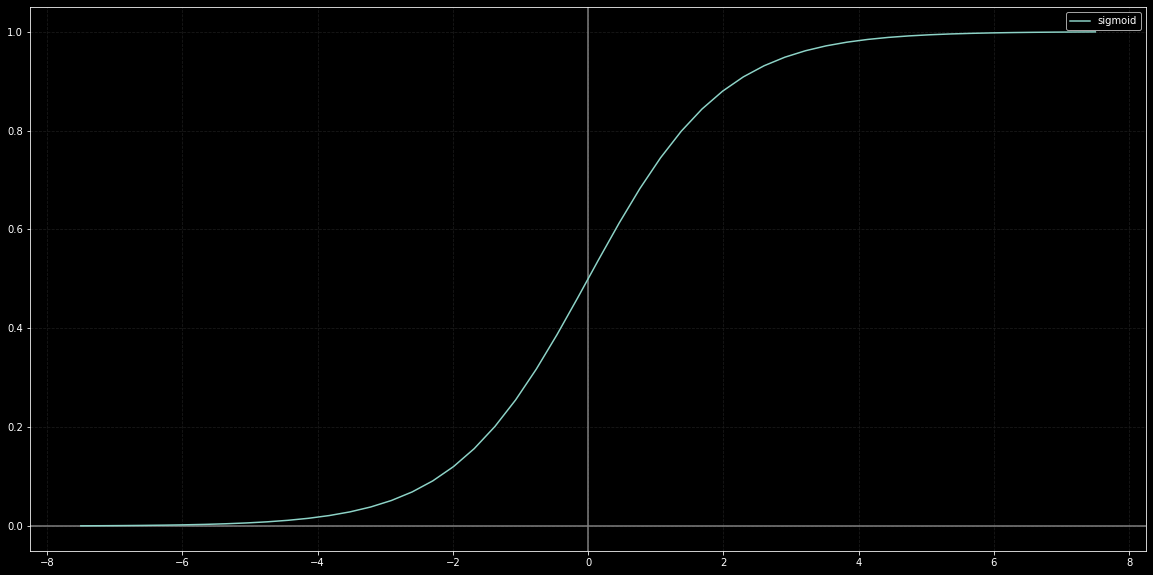

In [27]:
# Get a pair of axis and grid lines centred in (0, 0)
axhline(c='.5'); axvline(color='.5')
grid(c='.1', ls='--')

# Plot across a span of numbers
z = linspace(-7.5, 7.5)
plot(z, sigmoid(z), label='sigmoid');
legend();

In [28]:
# Full neuron function
def neuron(x, weights, bias):
    """
    Return a classical neuron output (reuse code above)
    """
    # pass  # ⬅️✏️
    return sigmoid(linear_neuron(x, weights, bias))

---

In [29]:
# Test neuron() function
neuron(my_x, my_w, my_b)

0.9999546021312976

In [40]:
# Package OR neuron weights and bias
def or_neuron(x):
    """
    Return x1 OR x2 (x1 + x2)
    """
    # pass  # ⬅️✏️
    return neuron(x, [1., 1.], -.5)

---

In [41]:
# Defina a collection of inputs to test OR and AND
my_x_collection = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

In [42]:
print('Checking OR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{or_neuron(my_x):.3f}')

Checking OR neuron output
[0, 0] 0.378
[0, 1] 0.622
[1, 0] 0.622
[1, 1] 0.818


In [59]:
# Package AND neuron weights and bias
def and_neuron(x):
    """
    Return x1 AND x2 (x1 * x2)
    """
    # pass  # ⬅️✏️
    weights = [5., 5.]
    bias = -6.
    return neuron(x, weights, bias)

---

In [60]:
print('Checking AND neuron output')
for my_x in my_x_collection:
    print(my_x, f'{and_neuron(my_x):.3f}')

Checking AND neuron output
[0, 0] 0.002
[0, 1] 0.269
[1, 0] 0.269
[1, 1] 0.982


In [63]:
# Package NOT neuron weight and bias
def not_neuron(x):
    """
    Return NOT x1 (x1_)
    """
    # pass  # ⬅️✏️
    return neuron(x, [-1.], 0.5)

---

In [64]:
print('Checking NOT neuron output')
for my_x in [[0], [1]]:
    print(my_x, f'{not_neuron(my_x):.3f}')

Checking NOT neuron output
[0] 0.622
[1] 0.378


![X-OR](res/x-or_circuit.png)

In [73]:
# Combine OR, AND, and NOT into a XOR neuron
def xor_neuron(x):
    """
    Return x1_ * x2 + x1 * x2_
    """
    # pass  # ⬅️✏️
    x_ = [not_neuron([i]) for i in x]
    z2 = [and_neuron([x_[0], x[1]]), and_neuron([x_[1], x[0]])]
    return or_neuron(z2)

---

In [74]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{xor_neuron(my_x):.3f}')

Checking XOR neuron output
[0, 0] 0.403
[0, 1] 0.601
[1, 0] 0.601
[1, 1] 0.714


![Half-adder](res/half-adder_circuit.png)

In [78]:
# Combine a XOR and an AND into a half-adder
# ⬅️✏️
def half_adder_neuron(x):
    return [xor_neuron(x[0:2]), and_neuron(x[0:2])]

In [79]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{half_adder_neuron(my_x)}')

Checking XOR neuron output
[0, 0] [0.40264160241382974, 0.0024726231566347743]
[0, 1] [0.6006559749313578, 0.2689414213699951]
[1, 0] [0.6006559749313578, 0.2689414213699951]
[1, 1] [0.7143961627681479, 0.9820137900379085]


---

![Adder](res/adder_circuit.png)

In [85]:
# Combine two half-adders and an OR into a (full) adder
# ⬅️✏️
def adder_neuron(x):
    z1 = half_adder_neuron(x[0:2])
    z2 = half_adder_neuron([x[2], z1[0]])
    z3 = [z2[0], or_neuron([z1[1], z2[1]])]
    return z3

print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{adder_neuron([*my_x, 0.])}')

Checking XOR neuron output
[0, 0] [0.4569313003828484, 0.3824159253672908]
[0, 1] [0.5136969039270056, 0.45425718351552735]
[1, 0] [0.5136969039270056, 0.45425718351552735]
[1, 1] [0.546686633680689, 0.6371636643218984]


---